In [ ]:
# default_exp nbeats.learner

In [ ]:
# hide
import sys

sys.path.append("..")
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# N-Beats Learner

> A basic architecture for time series forecasting.


The approach is based on https://arxiv.org/abs/1905.10437


In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
from fastcore.utils import *
from fastcore.imports import *
from fastai2.basics import *
from fastai2.callback.hook import num_features_model
from fastai2.callback.all import *
from fastai2.torch_core import *
from torch.autograd import Variable
from fastseq.all import *

from fastseq.nbeats.model import *
from fastseq.nbeats.callbacks import *

## Learner

In [ ]:
# export
# from fastai2.basics import *
# from fastseq.all import *

@delegates(NBeatsNet.__init__)
def nbeats_learner(dbunch:TSDataLoaders, output_channels=None, metrics=None,cbs=None, b_loss=0., loss_func=None, opt_func=None, **kwargs):
    "Build a N-Beats style learner"  
    model = NBeatsNet(
        device = dbunch.train.device,
        horizon = dbunch.train.horizon,
        lookback = dbunch.train.lookback, 
        **kwargs
       )
    lb = dbunch.train.lookback 
    loss_func = ifnone(loss_func, CombinedLoss(F.mse_loss, lb))
    cbs = L(cbs)
    if b_loss != 0.:
        raise NotImplementedError()
        cbs.append(NBeatsBLoss(b_loss))
    opt_func = ifnone(opt_func, ranger)        
    learn = Learner(dbunch, model, loss_func=loss_func, opt_func= opt_func, 
                    metrics=L(metrics)+L(mae, smape, NBeatsTheta(), 
                                         NBeatsBackward(lb), NBeatsForward(lb), ForwardSMAPE(lb)
                                        ),
                    cbs=L(NBeatsAttention())+cbs
                   )
    learn.lh = (dbunch.train.lookback/dbunch.train.horizon)
    return learn

# Example

(1, 85)
Train:110; Valid: 20; Test 10


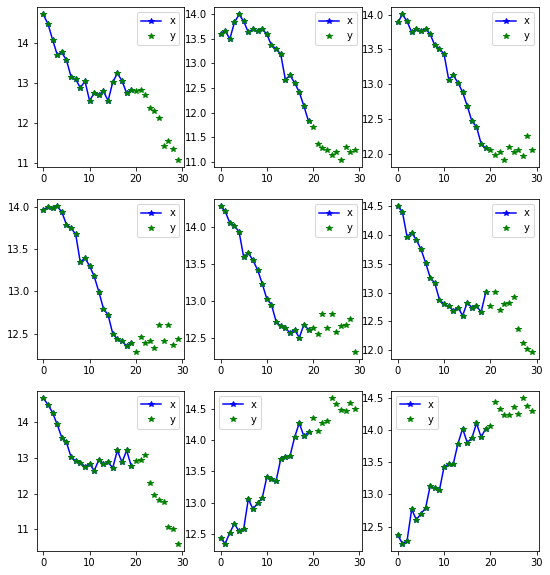

In [ ]:
horizon, lookback = 10,20
items = dummy_data_generator(75, 10, nrows=10)
data = TSDataLoaders.from_items(items, horizon = horizon, lookback=lookback, step=3, valid_pct=.5
                               )
data.show_batch()

In [ ]:
learn = nbeats_learner(data, metrics = NBeatsLossPart(0,-9,'Last'))

epoch,train_loss,valid_loss,Last,mae,smape,theta,b_loss,f_loss,f_smape,time
0,4.503861,4.276122,0.198660,1.066485,1.702529,0.090910,nan,nan,0.172096,00:01
1,3.882679,3.882362,0.181528,1.020999,1.547903,0.132729,nan,nan,0.154726,00:00
2,3.579792,3.691950,0.132820,0.982745,1.431832,0.306930,nan,nan,0.150932,00:00
3,3.466791,2.177217,0.084399,0.745303,0.977235,0.987222,nan,nan,0.097492,00:00
4,3.283105,2.354932,0.079065,0.751035,0.950528,1.304956,nan,nan,0.097970,00:00


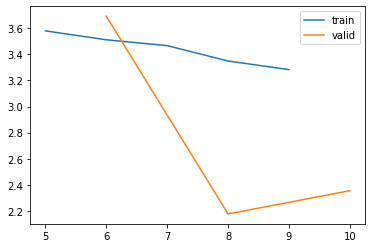

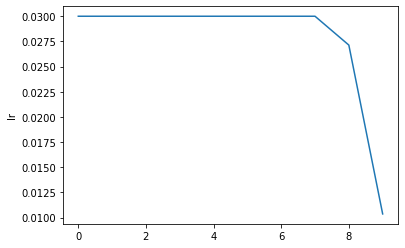

In [ ]:
learn.fit_flat_cos(5, 3e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

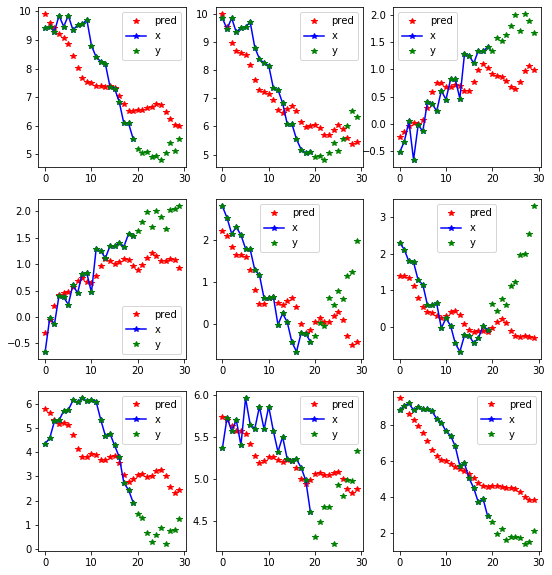

In [ ]:
learn.show_results()

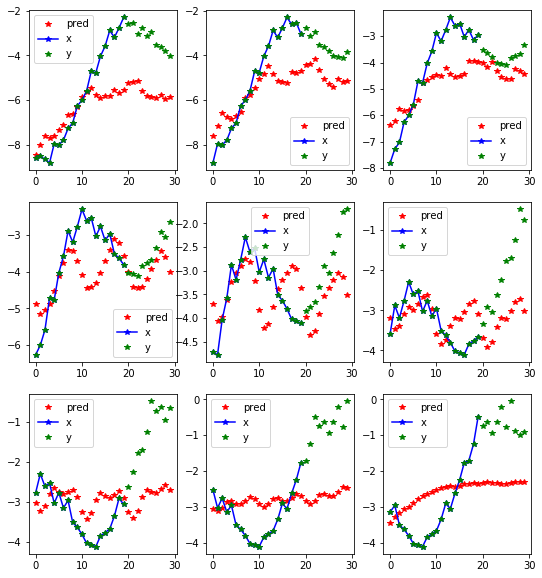

In [ ]:
learn.show_results(0)

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,-0.29973587,-0.20294055,-0.03109547,-0.11714697,-0.00836199,0.11202081
theta_0_std,0.61486304,0.8000404,0.34559253,0.33142605,0.32781237,0.3299975
theta_1_mean,-0.013373043,-0.00935214,-0.01582453,0.011355982,-0.0012693154,-0.012632762
theta_1_std,0.019088455,0.023187334,0.14136028,0.086675294,0.11071833,0.073259145
theta_2_mean,1.7291142e-05,-0.0008753341,0.36068255,-0.044498563,-0.005808751,0.0013584372
theta_2_std,0.0017255846,0.0018285766,0.8355213,0.8352149,0.01987379,0.01662062
theta_3_mean,0.0024652497,-7.876513e-05,NaN,-0.0310319,-0.39758366,0.15243284
theta_3_std,0.03500661,0.0002167299,NaN,0.06423591,0.790334,0.67478925
theta_4_mean,0.01688141,0.010520181,NaN,NaN,0.032521922,0.0023262694
theta_4_std,0.20457159,0.1036169,NaN,NaN,0.052365586,0.038209


In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 05_nbeats.models.ipynb.
Converted 06_nbeats.callbacks.ipynb.
Converted 07_nbeats.learner.ipynb.
Converted 08_nbeats.interpret.ipynb.
Converted 11_metrics.ipynb.
Converted 12_compare.ipynb.
Converted index.ipynb.
